<a href="https://colab.research.google.com/github/PankajHemnani/Simulation_of_text_data_transmission_over_an_AWGN/blob/main/Stimulation%20of%20txt%20data%20transmission%20over%20AWGN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def v_xor(bit0,bit1):
    if(bit0==bit1):
        return '0'
    else:
        return '1'

In [4]:
TextToBeEncoded = '''Essentially, we assist early-stage entrepreneurs in transforming their ideas from concept to commercialization. By providing low-cost work spaces, solid technical infrastructure, and coaching, we contribute significant value to companies during the ideation and product development phases. In addition to this, we assist entrepreneurs who aim to solve global challenges, with a special focus on firms from the Himalayan region. We have a soft spot for social impact startups as well. Open to all budding startups and innovators from across the country, we invite you to leverage the support provided by Catalyst and Startup in Hills!'''

In [5]:
distinct=[]
list1=[]
list_dec=[]
for i in TextToBeEncoded:
    if i not in distinct:
        distinct.append(i)
    else:
        pass

for i in distinct:
    n=TextToBeEncoded.count(i)
    t=(i,n)
    list1.append(t)
# print(list1)

list_sorted=sorted(list1, key=lambda y : y[1])

a=len(list1)
for i in range(a):       # Reversing the list to arrange in Decreasing order of no of occurence
    list_dec.append(list_sorted[a-i-1])

#print('\n\n----------------- FIXED LENGTH ENCODING PART-------------------------------------------------------------')
# print("\n\nFixed length Coding")
index=0
Encode={}                              #Blank Dictionary
grey=''

for i in list_dec:                   #Encoding dictionary: Assigns 5 bit binary to each character in the text
    index+=1
    binary='{0:06b}'.format(index)
    Encode.update({i[0]:binary})
# for i in Encode:
    # print(i,Encode[i])
    
    #print(f'{i[0]}     \t\t{binary}     \t\t{grey}')
# print(Encode)     #------->Uncomment to see the codes
CodedWord = ''
# print("\nCoded bits are---->")
for i in TextToBeEncoded:                                     # Encoding is done for the given string
    CodedWord = CodedWord + Encode.get(i)       
    
# print(CodedWord)



In [6]:
def hamming_distance(x, y):
    # determines hamming distancer between symbol x and symbol y 
    count = 0
    # assunption, x and y of same length
    for i in range(len(x)):
        if x[i] != y[i]:
            count += 1
    return count
  
def viterbi_decoder(code):
    result = ''
    A=''
    segmented_code=[]
    for i in range(0,len(code),2):
        A=A+str(code[i])+str(code[i+1])
        segmented_code.append(A)    
        A=''
    in_out_dict= {
        ('00', '00') : '00',
        ('00', '01') : '11',
        ('01', '10') : '10',
        ('01', '11') : '01',
        ('10', '00') : '10',
        ('10', '01') : '00',
        ('11', '10') : '01',
        ('11', '11') : '10',
    }
    all_possible_next_states = {
    '00' : ('00', '01'),
    '01' : ('10', '11'),
    '10' : ('00', '01'),
    '11' : ('10', '11')
    }
    first_state = '00'
    current_state = first_state
    for in_state in segmented_code:
        next_states = all_possible_next_states[current_state] # tupple of next possible states
        dist = [0, 0] # for storing hamming distance from next state to input_state
        for i in range(len(next_states)):
            # dist[i] = hamming_distance(in_state, next_states[i])
            dist[i] = hamming_distance(in_state, in_out_dict.get((current_state, next_states[i])))

        bit = str(np.argmin(dist)) # finds the correspoonding bit for the path with min hamming distance
        result = result + bit
        current_state = next_states[int(bit)] # saves the next current state for propagation in trellis diagram
    return result

In [7]:

def viterbi_encoder(inputs):
    
    #shift register encoder
    s_reg = ['0','0','0']
    obs = []
    for i in range(len(inputs)):
        #shifting the bits to right
        s_reg[2]=s_reg[1]
        s_reg[1]=s_reg[0]
        #inserting input
        s_reg[0]= inputs[i]
        state = s_reg[0]+ s_reg[1]
        #encoded bits
        thisState = v_xor(v_xor(s_reg[0],s_reg[1]),s_reg[2])+ v_xor(s_reg[0],s_reg[2])
        obs.append(thisState)
       
        output = ''
        for sym in obs:
            output = output + sym
    return output
    
ChannelEncoded = viterbi_encoder(CodedWord)
# print(f'Channel encoded signal ->\n{ChannelEncoded}')

In [8]:
binbits=np.array([])
for i in ChannelEncoded:
  binbits=np.append(binbits,int(i))

bpskout = 2*binbits-1

In [11]:
x=np.arange(0.1,1,0.0025)
wrong=[]

for sd in x:
  AWGN = np.random.normal(0,sd,len(binbits)) 
  Txbits = bpskout
  Rxbits = Txbits + AWGN

  Sxbits=[]
  for i in Rxbits:
    if(i<=0):
      Sxbits.append(0)
    else:
      Sxbits.append(1)
  demodulated_data = ''.join([str(i) for i in Sxbits])
  channel_decoded = viterbi_decoder(demodulated_data)
  Decode = {value:key for key, value in Encode.items()}
  result = ''
  for i in range(0, len(channel_decoded), 6):
      symbol = channel_decoded[i:i+6]
      result = result + Decode.get(symbol, '#')
  Wrongdetection = 0
  for i in range(len(result)):
    if(TextToBeEncoded[i]!=result[i]):
      Wrongdetection += 1
  wrong.append(Wrongdetection/len(result)*100)



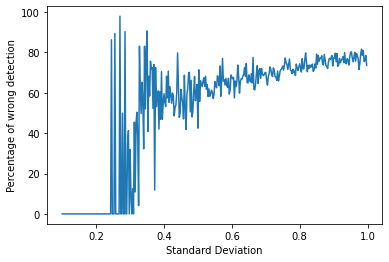

In [10]:
# print("Input text: ",TextToBeEncoded)
# print("Output text: ",Decode)
plt.plot(x,wrong)
plt.xlabel("Standard Deviation")
plt.ylabel("Percentage of wrong detection")
plt.show()